In [25]:
from src.data import fiw
import pathlib
import pandas as pd
import swifter
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
f_mid_paths = '../data/raw/v0.1.2/FIDs/'

fid_lut = fiw.load_mid_lut(f_mid_paths)
df_subjects = fiw.generate_table_of_subjects(fid_lut)


In [23]:
df_subjects.Gender = df_subjects.Gender.map({'f': 'Female', 'm': 'Male'})
df_subjects['Gender'].value_counts()

Female    2660
Male      2594
Name: Gender, dtype: int64

Text(0, 0.5, 'No. Subjects')

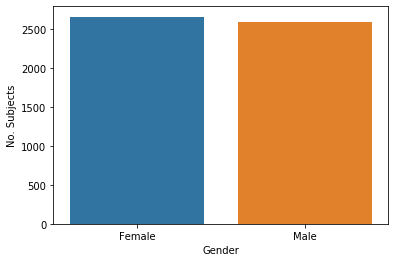

In [24]:
g = sns.countplot(data=df_subjects,x='Gender')
plt.ylabel('No. Subjects')

In [27]:
dir_data = '../data/raw/v0.1.2/'
f_datalist = f'{dir_data}lists/verification_pairs_list_5_fold.pkl'

datatable = pd.read_pickle(f_datalist)


In [28]:
datatable.head()

,fid,fold,label,p1,p2,type,score
70423,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00023_face3,bb,0.202813
70425,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00024_face1,bb,0.360719
70427,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00026_face2,bb,0.091086
70429,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00028_face1,bb,0.271225
70431,F0003,1,1,F0003/MID1/P00020_face0,F0003/MID4/P00023_face3,bb,0.132572


In [29]:
df_subjects.head()

,FID,MID,Gender
0,F0559,MID1,Female
1,F0559,MID2,Male
2,F0559,MID3,Female
3,F0559,MID4,Female
0,F0901,MID1,Male


In [31]:
df_subjects['id'] = df_subjects['FID'] + '.' + df_subjects['MID']
df_subjects.head()

,FID,MID,Gender,id
0,F0559,MID1,Female,F0559.MID1
1,F0559,MID2,Male,F0559.MID2
2,F0559,MID3,Female,F0559.MID3
3,F0559,MID4,Female,F0559.MID4
0,F0901,MID1,Male,F0901.MID1


In [48]:
datatable['id1'] = datatable.swifter.apply(lambda x: '.'.join(x['p1'].split('/')[:2]), axis=1)

In [49]:
datatable.head()

,fid,fold,label,p1,p2,type,score,id1,id2
70423,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00023_face3,bb,0.202813,F0003.MID1,F0003
70425,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00024_face1,bb,0.360719,F0003.MID1,F0003
70427,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00026_face2,bb,0.091086,F0003.MID1,F0003
70429,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00028_face1,bb,0.271225,F0003.MID1,F0003
70431,F0003,1,1,F0003/MID1/P00020_face0,F0003/MID4/P00023_face3,bb,0.132572,F0003.MID1,F0003


In [51]:
datatable['id2'] = datatable.swifter.apply(lambda x: '.'.join(x['p2'].split('/')[:2]), axis=1)

In [52]:
datatable.head()

,fid,fold,label,p1,p2,type,score,id1,id2
70423,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00023_face3,bb,0.202813,F0003.MID1,F0003.MID4
70425,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00024_face1,bb,0.360719,F0003.MID1,F0003.MID4
70427,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00026_face2,bb,0.091086,F0003.MID1,F0003.MID4
70429,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00028_face1,bb,0.271225,F0003.MID1,F0003.MID4
70431,F0003,1,1,F0003/MID1/P00020_face0,F0003/MID4/P00023_face3,bb,0.132572,F0003.MID1,F0003.MID4


In [53]:
datatable.reset_index(inplace=True)
datatable.head()

,index,fid,fold,label,p1,p2,type,score,id1,id2
0,70423,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00023_face3,bb,0.202813,F0003.MID1,F0003.MID4
1,70425,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00024_face1,bb,0.360719,F0003.MID1,F0003.MID4
2,70427,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00026_face2,bb,0.091086,F0003.MID1,F0003.MID4
3,70429,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00028_face1,bb,0.271225,F0003.MID1,F0003.MID4
4,70431,F0003,1,1,F0003/MID1/P00020_face0,F0003/MID4/P00023_face3,bb,0.132572,F0003.MID1,F0003.MID4


In [69]:
datatable['id'] = datatable['id1']
datatable2 = datatable.merge(df_subjects)
datatable2['g1'] = datatable2['Gender']
del datatable2['Gender']
del datatable2['MID']
del datatable2['FID']

datatable2.head()

,index,fid,fold,label,p1,p2,type,score,id1,id2,id,g1
0,70423,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00023_face3,bb,0.202813,F0003.MID1,F0003.MID4,F0003.MID1,Female
1,70425,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00024_face1,bb,0.360719,F0003.MID1,F0003.MID4,F0003.MID1,Female
2,70427,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00026_face2,bb,0.091086,F0003.MID1,F0003.MID4,F0003.MID1,Female
3,70429,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00028_face1,bb,0.271225,F0003.MID1,F0003.MID4,F0003.MID1,Female
4,70431,F0003,1,1,F0003/MID1/P00020_face0,F0003/MID4/P00023_face3,bb,0.132572,F0003.MID1,F0003.MID4,F0003.MID1,Female


In [70]:
datatable['id'] = datatable['id2']
datatable2 = datatable2.merge(df_subjects,)
datatable2['g2'] = datatable2['Gender']
del datatable2['Gender']
del datatable2['MID']
del datatable2['FID']

datatable2.head()


,index,fid,fold,label,p1,p2,type,score,id1,id2,id,g1,g2
0,70423,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00023_face3,bb,0.202813,F0003.MID1,F0003.MID4,F0003.MID1,Female,Female
1,70425,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00024_face1,bb,0.360719,F0003.MID1,F0003.MID4,F0003.MID1,Female,Female
2,70427,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00026_face2,bb,0.091086,F0003.MID1,F0003.MID4,F0003.MID1,Female,Female
3,70429,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00028_face1,bb,0.271225,F0003.MID1,F0003.MID4,F0003.MID1,Female,Female
4,70431,F0003,1,1,F0003/MID1/P00020_face0,F0003/MID4/P00023_face3,bb,0.132572,F0003.MID1,F0003.MID4,F0003.MID1,Female,Female


In [71]:
datatable2.g1 = datatable2.g1.map({'Female': 'f', 'Male': 'm'})
datatable2.g2 = datatable2.g2.map({'Female': 'f', 'Male': 'm'})
datatable2.head()

,index,fid,fold,label,p1,p2,type,score,id1,id2,id,g1,g2
0,70423,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00023_face3,bb,0.202813,F0003.MID1,F0003.MID4,F0003.MID1,f,f
1,70425,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00024_face1,bb,0.360719,F0003.MID1,F0003.MID4,F0003.MID1,f,f
2,70427,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00026_face2,bb,0.091086,F0003.MID1,F0003.MID4,F0003.MID1,f,f
3,70429,F0003,1,1,F0003/MID1/P00019_face1,F0003/MID4/P00028_face1,bb,0.271225,F0003.MID1,F0003.MID4,F0003.MID1,f,f
4,70431,F0003,1,1,F0003/MID1/P00020_face0,F0003/MID4/P00023_face3,bb,0.132572,F0003.MID1,F0003.MID4,F0003.MID1,f,f


In [101]:
datatable2.loc[(datatable2.type=='bb') | (datatable2.type == 'ss') | (datatable2.type == 'sibs'), 'type'] = 'sibs'
datatable2.loc[((datatable2.type == 'sibs') & (datatable2.loc[ids].g1 == 'f') 
                & (datatable2.loc[ids].g2 == 'f')),'type'] = 'ss'
datatable2.loc[((datatable2.type == 'sibs') & (datatable2.loc[ids].g1 == 'm') 
                & (datatable2.loc[ids].g2 == 'm')),'type'] = 'bb'

In [103]:
datatable2['type'].value_counts()

bb      311486
ss      209204
fs      138145
ms      129749
fd       99324
md       92491
gfgd      8132
gmgd      6906
gfgs      6700
gmgs      5872
sibs         0
Name: type, dtype: int64